# Quadratic Voting 

**Date:** *22 October 2024*  
**Author:** *Jinyoung Kim*

**What is it:** It is a system designed to allow voters not only to express their preferences but also to indicate how strongly they feel about a particular issue. Unlike traditional voting where each person gets one vote per issue, QV allows participants to cast multiple votes on an issue where the cost of each additional vote rises quadratically. This mechanism aims to balance majority rule with the intensity of preferences, allowing for more nuanced decision-making.


1. **Toy Example**:
    - Imagine a group of 5 people deciding on 3 proposals with 10 credits each.
    - In traditional voting, each person can give one vote per proposal.
    - In QV, they can spend multiple votes but must decide how much to spend, considering the quadratic cost.

Underlying Preferences:
         Issue 1  Issue 2
Voter 1       10        1
Voter 2        1        2
Voter 3        1        2
Voter 4        1        2
Voter 5        1        2

Normal Voting Ballots:
         Issue 1  Issue 2
Voter 1        1        0
Voter 2        0        1
Voter 3        0        1
Voter 4        0        1
Voter 5        0        1

Quadratic Voting Ballots:
         Issue 1  Issue 2
Voter 1     10.0      0.0
Voter 2      6.0      8.0
Voter 3      6.0      8.0
Voter 4      6.0      8.0
Voter 5      6.0      8.0


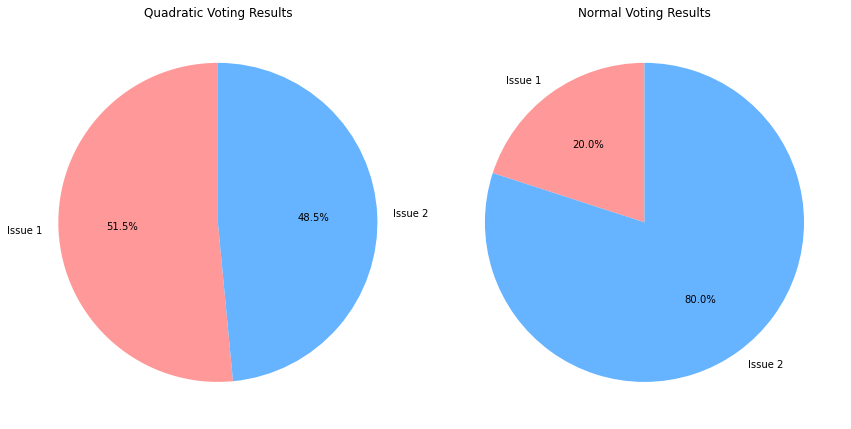

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Toy example setup
n_voters = 5
n_issues = 2
initial_credits = 100
np.random.seed(0)  # For reproducibility

# Generate underlying preferences
preferences = np.array([
    [10, 1],  # Voter 1 cares deeply about Issue 1
    [1, 2],   # Other voters mildly prefer Issue 2
    [1, 2],
    [1, 2],
    [1, 2]
])

# Normal voting: 1 vote for the most preferred issue
votes_normal = np.zeros((n_voters, n_issues), dtype=int)
for voter in range(n_voters):
    most_preferred = np.argmax(preferences[voter])
    votes_normal[voter, most_preferred] = 1

# Quadratic voting
votes_qv = np.zeros((n_voters, n_issues))
votes_qv[0] = [10, 0]  # Allocating 8 votes to Issue 1 and 6 votes to Issue 2 for Voter 1
for voter in range(1, n_voters):
    votes_qv[voter] = [6, 8]  # Other voters mildly prefer Issue 2

# Create DataFrames for visualization
df_preferences = pd.DataFrame(preferences, columns=[f'Issue {i+1}' for i in range(n_issues)], index=[f'Voter {i+1}' for i in range(n_voters)])
df_normal = pd.DataFrame(votes_normal, columns=[f'Issue {i+1}' for i in range(n_issues)], index=[f'Voter {i+1}' for i in range(n_voters)])
df_qv = pd.DataFrame(votes_qv, columns=[f'Issue {i+1}' for i in range(n_issues)], index=[f'Voter {i+1}' for i in range(n_voters)])

# Display the results
print("Underlying Preferences:")
print(df_preferences)
print("\nNormal Voting Ballots:")
print(df_normal)
print("\nQuadratic Voting Ballots:")
print(df_qv)

# Visualizing voting results
total_votes_normal = votes_normal.sum(axis=0)
total_votes_qv = votes_qv.sum(axis=0)

labels = [f"Issue {i+1}" for i in range(n_issues)]
colors = ['#ff9999', '#66b3ff']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Quadratic Voting Pie Chart
ax1.pie(total_votes_qv, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Quadratic Voting Results')

# Normal Voting Pie Chart
ax2.pie(total_votes_normal, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Normal Voting Results')

plt.tight_layout()
plt.show()



2. **Federal Election Example**:
    - Simulate a voting system where citizens vote on multiple national issues (e.g., healthcare, defense, education).
    - In traditional voting, citizens cast a single vote per issue.
    - In QV, citizens allocate their credits to the issues they care most about, with the quadratic cost adjusting their influence.

In [2]:
# Federal election setup
n_citizens = 100  # Number of voters
n_issues = 5  # Number of issues
initial_credits = 20  # Credits for each citizen
votes = np.zeros((n_citizens, n_issues))

# Simulate voting based on citizen preferences
for citizen in range(n_citizens):
    remaining_credits = initial_credits
    for issue in range(n_issues):
        max_votes = int(np.sqrt(remaining_credits))
        if max_votes > 0:
            vote_cast = np.random.randint(0, max_votes + 1)
            votes[citizen, issue] = vote_cast
            remaining_credits -= costs(vote_cast)

# Display results
display_results(votes)


Issue 1: Total votes = 189.0
Issue 2: Total votes = 174.0
Issue 3: Total votes = 117.0
Issue 4: Total votes = 79.0
Issue 5: Total votes = 73.0



3. **Portfolio Planning Example**:
    - In project portfolio planning, QV could help decide which projects to prioritize based on stakeholder preferences.
    - Each stakeholder is given a certain number of voting credits and casts votes based on the strength of their preferences for each project.

Project 1: Total votes = 7.0
Project 2: Total votes = 16.0
Project 3: Total votes = 17.0
Project 4: Total votes = 14.0


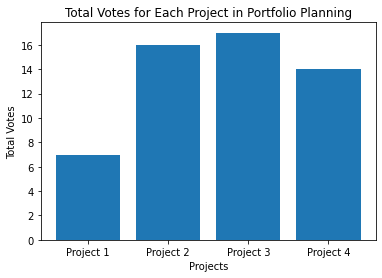

In [4]:
# Portfolio planning setup
n_team_members = 10
n_projects = 4
initial_credits = 15
votes = np.zeros((n_team_members, n_projects))

# Simulate voting on projects
for member in range(n_team_members):
    remaining_credits = initial_credits
    for project in range(n_projects):
        max_votes = int(np.sqrt(remaining_credits))
        if max_votes > 0:
            vote_cast = np.random.randint(0, max_votes + 1)
            votes[member, project] = vote_cast
            remaining_credits -= costs(vote_cast)

# Display results
def display_results(votes):
    total_votes = np.sum(votes, axis=0)
    for project in range(n_projects):
        print(f"Project {project + 1}: Total votes = {total_votes[project]}")

display_results(votes)

# Visualize results
labels = [f"Project {i+1}" for i in range(n_projects)]
total_votes = np.sum(votes, axis=0)

plt.bar(labels, total_votes)
plt.xlabel('Projects')
plt.ylabel('Total Votes')
plt.title('Total Votes for Each Project in Portfolio Planning')
plt.show()
